<a href="https://colab.research.google.com/github/ayanoglu/REDGPA/blob/main/REDGPAmain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from numpy import array
from sklearn import preprocessing
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=160)
import tensorflow as tf
import csv
import math
import matplotlib.pyplot as plt
from decimal import *
from google.colab import files
import plotly.graph_objects as go
import plotly.express as px
import itertools
from itertools import combinations
import time
from sklearn.metrics import mean_squared_error
import io

uploaded = files.upload()

Saving Survey_numerical_score_GPA.csv to Survey_numerical_score_GPA.csv


In [ ]:
DF = pd.read_csv(io.BytesIO(uploaded['Survey_numerical_score_GPA.csv']), header=None, skip_blank_lines=True)

In [ ]:
DF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43
0,6,6,6,6,6,6,7,5,3,3,5,5,6,4,4,6,5,7,6,6,6,3,5,5,4,5,5,5,6,5,5,1,1,1,1,1,3,3,4,1,5,5,3.30
1,7,7,6,6,6,7,7,7,5,6,6,2,2,4,7,6,7,7,4,6,5,6,2,2,6,6,6,2,6,4,4,4,7,3,1,4,1,1,4,4,5,2,3.21
2,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,7,6,6,6,1,4,3,5,5,1,1,1,1,4,4,4,2,2.70
3,6,6,6,5,6,6,5,7,3,7,4,4,4,3,3,3,7,5,5,5,4,5,4,5,5,5,5,4,4,1,1,1,7,1,1,2,2,2,2,1,4,5,3.30
4,6,7,6,6,6,6,7,5,4,3,5,1,1,5,7,7,6,2,2,7,5,4,1,1,6,7,4,5,1,4,4,4,7,1,1,1,1,1,5,4,4,2,3.30


In [ ]:
DF.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,6.048128,6.272727,5.882353,5.855615,6.203209,5.326203,6.171123,5.732620,3.684492,4.743316,4.352941,3.850267,4.267380,4.240642,6.112299,6.058824,5.721925,3.743316,4.545455,6.213904,4.871658,4.048128,4.700535,4.508021,4.326203,5.342246,5.149733,3.518717,3.737968,3.898396,4.085561,3.165775,4.545455,1.625668,1.716578,1.978610,2.219251,2.336898,3.572193,2.331551,4.288770,3.326203,3.320214
std,0.990728,0.870950,1.134531,1.157262,0.892857,1.689788,1.160562,1.197289,1.805584,1.582293,1.698681,1.753349,1.873171,1.799300,1.206260,1.150860,1.185803,1.891803,1.808528,1.081228,1.676722,1.757575,1.821659,1.841484,1.711915,1.672189,1.498758,1.861732,2.061110,1.879530,1.878902,2.288190,1.766419,1.130698,1.116780,1.213531,1.112033,1.327491,0.949746,1.465451,0.606446,1.588097,0.426340
min,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.760000
25%,6.000000,6.000000,5.000000,5.000000,6.000000,4.000000,6.000000,5.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,6.000000,6.000000,5.000000,2.000000,3.000000,6.000000,4.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,4.000000,2.000000,3.005000
50%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,7.000000,6.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,6.000000,6.000000,6.000000,4.000000,5.000000,7.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,5.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,2.000000,4.000000,3.000000,3.320000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,5.000000,5.000000,6.000000,6.000000,7.000000,7.000000,7.000000,5.000000,6.000000,7.000000,6.000000,5.000000,6.000000,6.000000,6.000000,7.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,5.000000,5.000000,3.635000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.690000


In [ ]:
DF.isna().sum()

In [ ]:
DF = DF.dropna(axis=1)
DF.isna().sum()

In [ ]:
X = DF.iloc[:,:-1]
y = DF.iloc[:,-1]
X.head()

In [ ]:
cormat = X.corr('pearson')
sorted_mat = cormat.unstack().sort_values(ascending=False).drop_duplicates()
sorted_mat

In [ ]:
X_norm = X*4/10
X_norm

In [ ]:
X_norm.skew() # -0.5 to 0.5 values are moderatly skewed, meaning closer to a normal distribution.

In [ ]:
DF2 = pd.concat((X_norm, y), axis = 1)
DF2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43
0,2.4,2.4,2.4,2.4,2.4,2.4,2.8,2.0,1.2,1.2,2.0,2.0,2.4,1.6,1.6,2.4,2.0,2.8,2.4,2.4,2.4,1.2,2.0,2.0,1.6,2.0,2.0,2.0,2.4,2.0,2.0,0.4,0.4,0.4,0.4,0.4,1.2,1.2,1.6,0.4,2.0,2.0,3.30
1,2.8,2.8,2.4,2.4,2.4,2.8,2.8,2.8,2.0,2.4,2.4,0.8,0.8,1.6,2.8,2.4,2.8,2.8,1.6,2.4,2.0,2.4,0.8,0.8,2.4,2.4,2.4,0.8,2.4,1.6,1.6,1.6,2.8,1.2,0.4,1.6,0.4,0.4,1.6,1.6,2.0,0.8,3.21
2,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.8,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.8,2.4,2.4,2.4,0.4,1.6,1.2,2.0,2.0,0.4,0.4,0.4,0.4,1.6,1.6,1.6,0.8,2.70
3,2.4,2.4,2.4,2.0,2.4,2.4,2.0,2.8,1.2,2.8,1.6,1.6,1.6,1.2,1.2,1.2,2.8,2.0,2.0,2.0,1.6,2.0,1.6,2.0,2.0,2.0,2.0,1.6,1.6,0.4,0.4,0.4,2.8,0.4,0.4,0.8,0.8,0.8,0.8,0.4,1.6,2.0,3.30
4,2.4,2.8,2.4,2.4,2.4,2.4,2.8,2.0,1.6,1.2,2.0,0.4,0.4,2.0,2.8,2.8,2.4,0.8,0.8,2.8,2.0,1.6,0.4,0.4,2.4,2.8,1.6,2.0,0.4,1.6,1.6,1.6,2.8,0.4,0.4,0.4,0.4,0.4,2.0,1.6,1.6,0.8,3.30


In [ ]:
  train_Input, val_Input, test_input = np.split(DF2, [int(.6 * len(DF2)), int(.8 * len(DF2))])

  X_train_Input = train_Input.iloc[:,:-1]
  y_train= train_Input.iloc[:,-1]
  X_val_Input = val_Input.iloc[:,:-1]
  y_val= val_Input.iloc[:,-1]
  X_test_Input = test_input.iloc[:,:-1]
  y_test= test_input.iloc[:,-1]

In [ ]:
print(f'Length of training set is', len(X_train_Input))
print(f'Length of validation set is', len(X_val_Input))
print(f'Length of test set is', len(X_test_Input))

Length of training set is 112
Length of validation set is 37
Length of test set is 38


In [ ]:
DF2.shape

(187, 43)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train_Input, y_train)
gaussian_process.kernel_

1.86**2 * RBF(length_scale=6.74)

ValueError: ignored

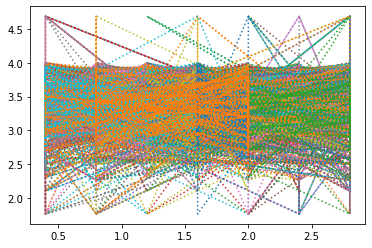

In [ ]:
mean_prediction, std_prediction = gaussian_process.predict(X_norm, return_std=True)

plt.plot(X_norm, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train_Input, y_train, label="Observations")
plt.plot(X_norm, mean_prediction, label="Mean prediction")
plt.fill_between(
    X_norm.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [ ]:
model.Sequential()
